## **Project Final Report**

### **Name**
1. Dara Mandy
2. Nagato Fukuhara
3. Nina Liu
4. Yinze Zhao

### **Purpose**
The purpose of this project is to determine whether player characteristics and behaviors can predict whether player subcribes to the Minectract research newsletter.

## **Introduction**

Running an online game server means constantly balancing player experience with limited technical resources. If too many people are online at once, the server can lag or even crash; if very few people use the server, time and money are wasted maintaining unused capacity. At UBC, a research group led by Frank Wood operates a public Minecraft server to study how people play and interact in virtual worlds. To plan recruitment, schedule studies and provision hardware effectively, the team needs to understand what kinds of players join the server and how engaged those players become over time.

In this project, we focus on the players.csv dataset, which contains one row per player. Each row corresponds to an anonymized participant on the Minecraft research server and includes information describing that player’s participation in the project. Broadly, the variables in players.csv record when a player joined the server and several measures of how much they used it overall (for example, counts of how often they played and how long they stayed in total). Because this dataset summarizes behaviour at the player level, it is well suited for studying differences between “more engaged” and “less engaged” players.

Our analysis is based on Question 1 from the project description. In this question, we investigate how well we can use the information stored in players.csv to predict a player’s overall level of engagement with the server. Concretely, we treat one summary measure of usage (our response variable) as a proxy for engagement, and we use the remaining variables in players.csv as predictors. This allows us to ask: given what we know about players in this dataset, can we predict how engaged that player would be with the Minecraft server based on if they're subscribed to game-related newsletters? Answering this question can help the research team identify which kinds of players are most likely to become active participants and may guide future recruitment or design decisions.

In the rest of the report, we describe how we clean and wrangle players.csv, explore the relationships between engagement and other player characteristics, and build a predictive model to address Question 1. We then evaluate the model’s performance and discuss what our findings suggest about player behaviour on the Minecraft research server.

### Question

Broad: what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? (Question 1)

Specific: Can a game player's playing duration, age, experience level, and gender predict if they will subscribe to a game-related newsletter?

### Data Description

### players.csv

This data shows all unique players including data about each player like their experiences, behaviours, names, genders, and ages. The data has a total of 196 observations and 7 variables. The variables are as listed below:

| **Variable**   | **Type** | **Description**            | 
|----------------|----------|----------------------------|
| `experience`   | chr      | Level of players in game, for example: Amateur, Beginner, Regular, Pro, Veteran. |           
| `subscribe`    | lgl      | Indicates whether if the player has an active subscription.|           
| `hashedEmail`  | chr      | Player identifier in game.|           
| `played_hours` | dbl      | Indicates how long the player has played the game.|          
| `name`         | chr      | Player's name.|           
| `gender`       | chr      | Player's gender.|           
| `age`          | dbl      | Player's age.|     

Age, experience level, email address, and gender were collected through self-reporting when signing up, and playtime was collected through the game server.

## **Methods**

### 1) Reading, Cleaning, and Wrangling the Data.

First, we begin the exploratory data analysis and visualization by loading the dataset into our notebook. In this case, we are going to use the read_csv because it's a comma-separated values file (players.csv). Then, we operate the wrangling methods into our dataframe such as removing missing or inconsistent values and standardised any variables that required formatting.

### 2) Exploratory Data Analysis

Second, we visualized the dataset to understand patterns and distributions. Which includes:
- Plotting scatterplots of age and hours played
- Creating bar charts for subscription rates
- Comparing characteristics among different player types, as a result this will help us identify relationships worth testing further

### 3) Classification

Third, we are given a predictive question. Hence, we are going to use classification to predict the answer to the question.

**Data Splitting**

To continue, we are going to split the data to build the predictive model, which includes:
- A training set used to fit our model
- A test set used to evaluate model perfomance on unseen data

**Predictors**

Next, the predictors that we are going to use to predict whether a player subscribes to the news letter, as follows:
- hours played
- age
- player type

**Model Evaluation**

The metrics that we are going to use to evaluate the model performace are:
- Accuracy
- Confusion matrices
- Classification errror

**Key Findings**

We will identify which player characteristics contribute most strongly to predicting newsletter subscription and compare these characteristics across different player types to understand the behavioural differences in the game.

In [45]:
library(tidyverse)
library(repr)
library(tidymodels)
#source("cleanup.R") #something wrong here but im not sure what -dara

In [46]:
# Loading in data

players_data <- read_csv("players.csv")
head(players_data)

nrow(players_data)
ncol(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [47]:
# Players summary statistics

glimpse(players_data)
summary(players_data)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [48]:
# players summary statistics

players_data %>% summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    total_players = n(),
    subscribe_count = sum(subscribe == "TRUE", na.rm = TRUE),
    percentage_subscribe = subscribe_count / total_players * 100) %>%
    round(2)

mean_played_hours,mean_age,median_played_hours,total_players,subscribe_count,percentage_subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


In [52]:
# Wrangling players data

# use mutate to change experience to numbers (hierarchy) high experience -> 5
players <- players_data |>
    select(-hashedEmail, -gender, -name) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(experience = as_factor(experience)) |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")),
           experience = as.numeric(experience))
head(players)

experience,subscribe,played_hours,Age
<dbl>,<fct>,<dbl>,<dbl>
4,TRUE,30.3,9
5,TRUE,3.8,17
5,FALSE,0.0,17
2,TRUE,0.7,21
3,TRUE,0.1,21
2,TRUE,0.0,17


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


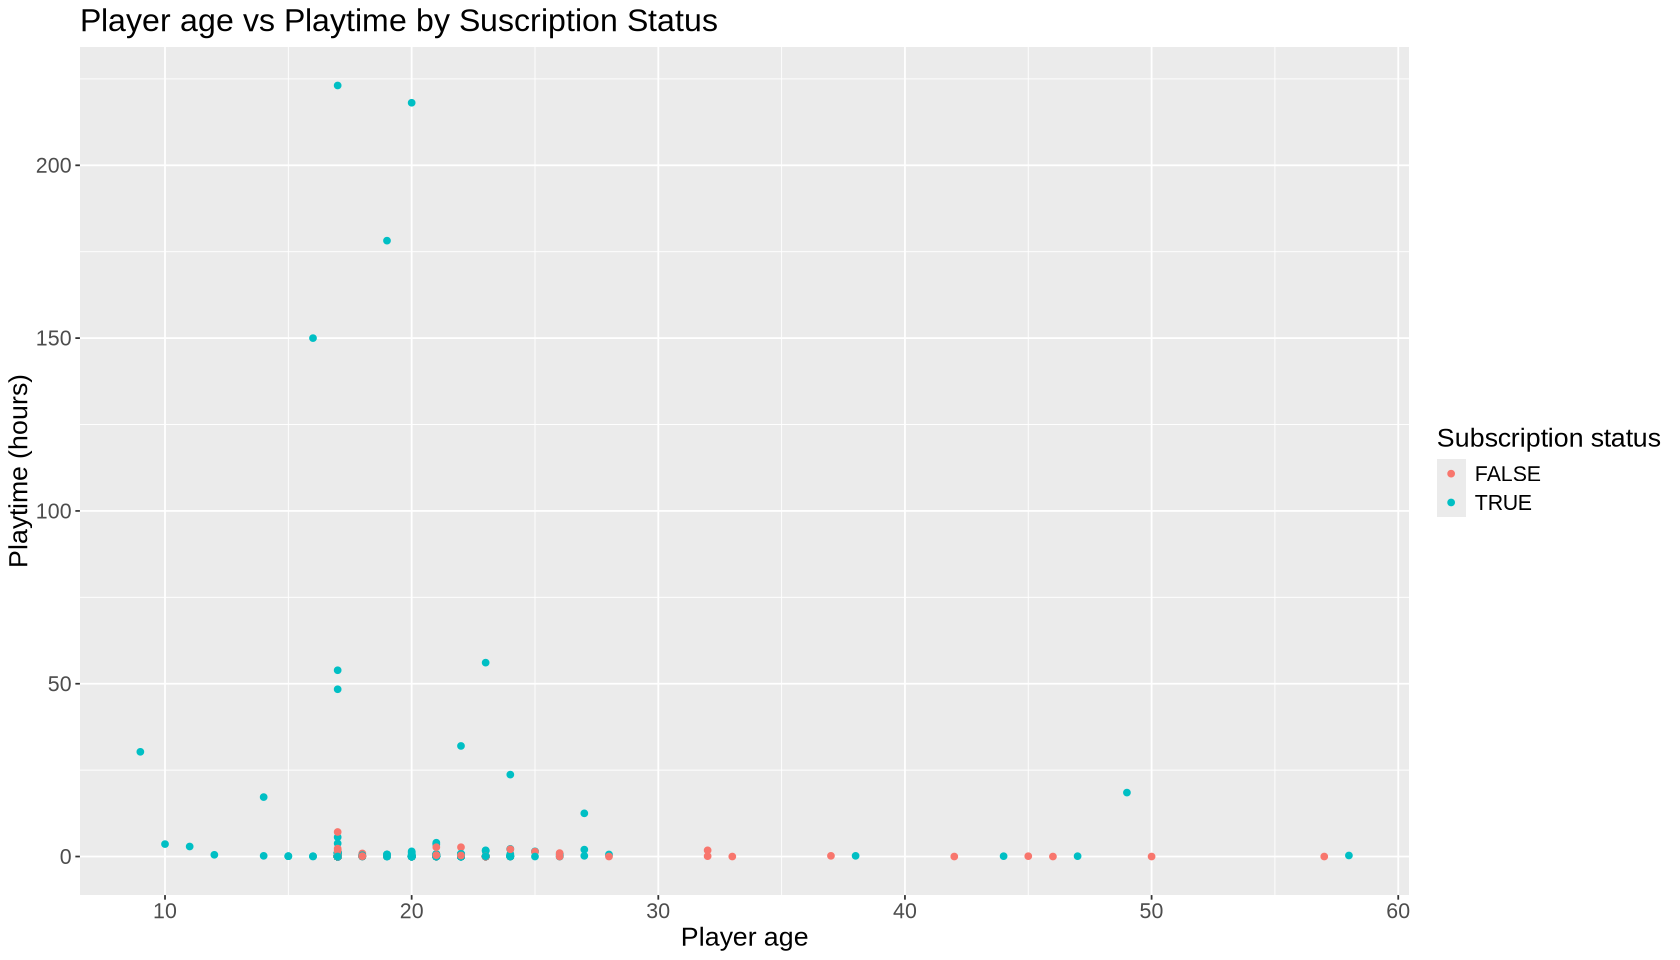

In [58]:
# Scatterplot of age vs playtime
options(repr.plot.width = 14, repr.plot.height = 8)

age_v_playtime <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Player age",
             y = "Playtime (hours)",
             title = "Player age vs Playtime by Suscription Status",
             color = "Subscription status") +
        theme(text = element_text(size = 16))
age_v_playtime

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


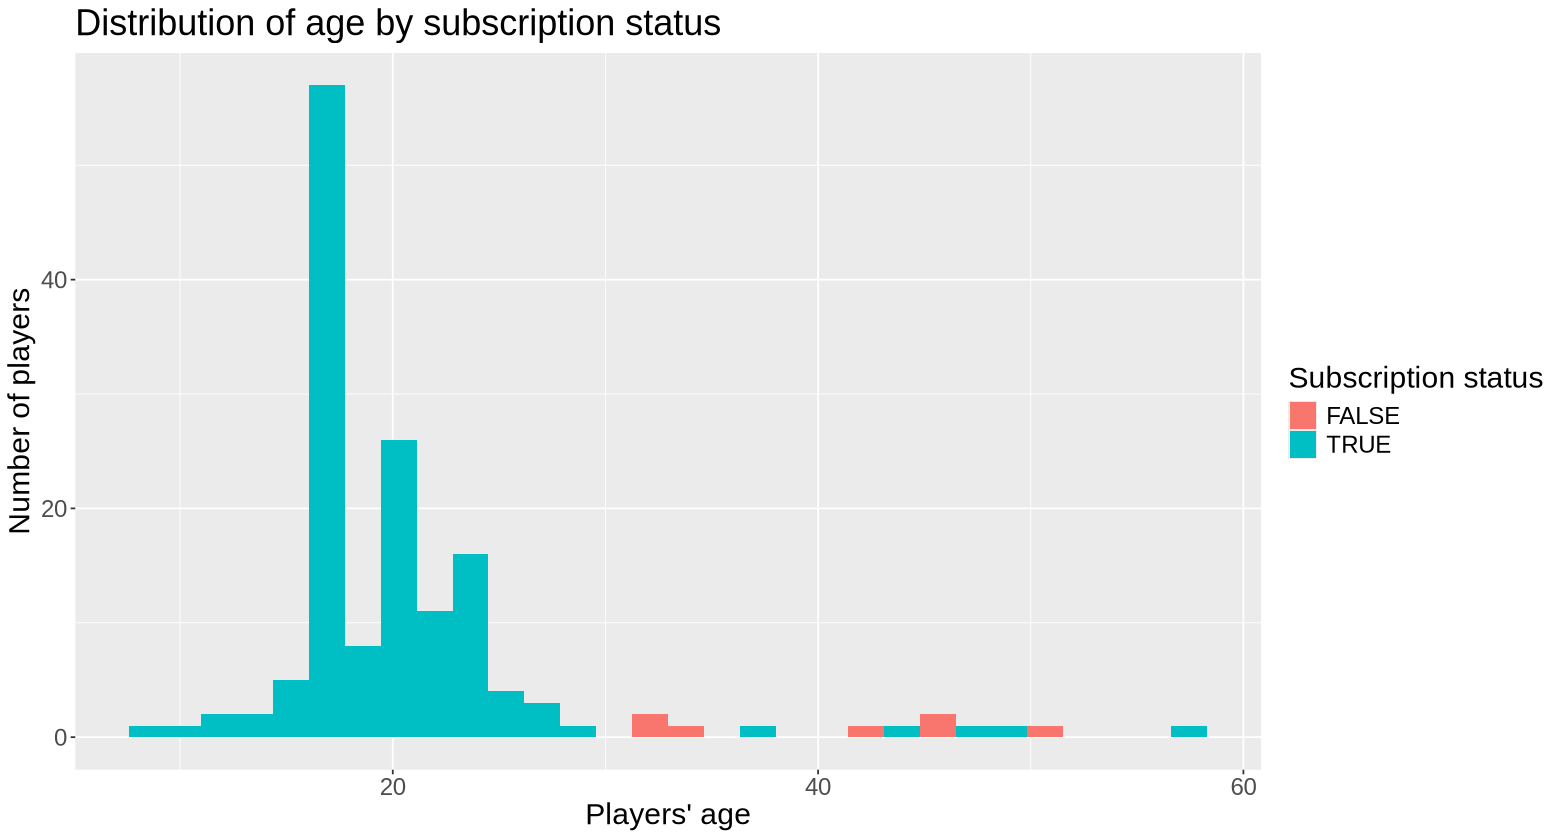

In [60]:
# Histogram of age and subscription status
options(repr.plot.width = 13, repr.plot.height = 7)

age_v_sub <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
        geom_histogram(position = "identity", bins = 30) +
        labs(x = "Players' age",
             y = "Number of players",
             title = "Distribution of age by subscription status",
             fill = "Subscription status") +
        theme(text = element_text(size = 18))
age_v_sub

In [61]:
players_split <- initial_split(players, prop = 0.7, strata = subscribe) 
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ ., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)
players_fit

# players_predictions <- predict(players_fit, players_test) |>
#     bind_cols(players_test) |>
#     metrics(truth = subscribe, estimate = .pred_class) |>
#     filter(.metric == "accuracy")
# players_predictions

Warning message:
“tune samples were requested but there were 136 rows in the data. 131 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2666667
Best kernel: rectangular
Best k: 131

## **Discussion**

## **References**

https://rdrr.io/r/base/factor.html